### Assignment 1 on Intensity Transformations and Neighborhood Filtering

#### Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b.

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

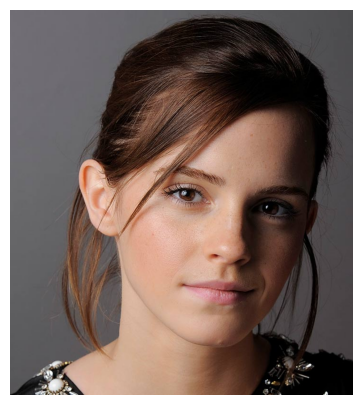

In [19]:
emma = cv.imread(r'D:\Academics\EN3160 - Image Processing and Machine Vision\images\emma.jpg')

fig, ax = plt.subplots(figsize=(15,5))

assert emma is not None
ax.imshow(cv.cvtColor(emma, cv.COLOR_BGR2RGB))
ax.axis('off')
plt.show()


In [ ]:
intensity_func = lambda x: 0.299*x[2] + 0.587*x[1] + 0.114*x[0]